<a href="https://colab.research.google.com/github/nikithimma/catvsdogprediction/blob/main/dogsandcats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

 98% 1.04G/1.06G [00:06<00:00, 218MB/s]
100% 1.06G/1.06G [00:06<00:00, 186MB/s]


In [ ]:
import zipfile
zip_ref =zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()


In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [ ]:
train_ds= keras.utils.image_dataset_from_directory(
    directory ='/content/train',
    labels ='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds= keras.utils.image_dataset_from_directory(
    directory ='/content/test',
    labels ='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)



Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
def process (image,label):
  image=tf.cast(image/255., tf.float32)
  return image,label

train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)

In [ ]:
model =Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation ='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0,1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0,1))
model.add(Dense(1,activation='sigmoid'))




In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history= model .fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 66s 93ms/step - loss: 2.0762 - accuracy: 0.6204 - val_loss: 0.6213 - val_accuracy: 0.6772
Epoch 2/10
625/625 [==============================] - 59s 94ms/step - loss: 0.5587 - accuracy: 0.7358 - val_loss: 0.5703 - val_accuracy: 0.7230
Epoch 3/10
625/625 [==============================] - 60s 95ms/step - loss: 0.5407 - accuracy: 0.7570 - val_loss: 0.7466 - val_accuracy: 0.6764
Epoch 4/10
625/625 [==============================] - 62s 99ms/step - loss: 0.4361 - accuracy: 0.8124 - val_loss: 0.6846 - val_accuracy: 0.7530
Epoch 5/10
625/625 [==============================] - 59s 93ms/step - loss: 0.3443 - accuracy: 0.8518 - val_loss: 0.6114 - val_accuracy: 0.7716
Epoch 6/10
625/625 [==============================] - 62s 99ms/step - loss: 0.2211 - accuracy: 0.9095 - val_loss: 0.8141 - val_accuracy: 0.7600
Epoch 7/10
625/625 [==============================] - 59s 93ms/step - loss: 0.2046 - accuracy: 0.9276 - val_loss: 0.8052 - val_accuracy:

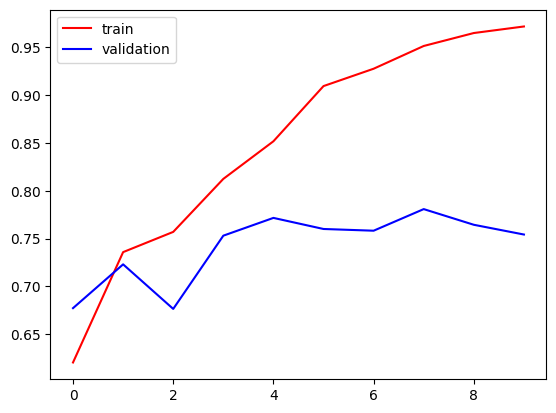

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot (history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
import cv2

In [ ]:
test_image=cv2.imread('/content/dog.28.jpg')

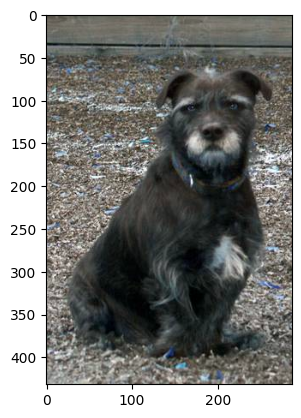

In [ ]:
plt.imshow(test_image)

In [ ]:
test_image.shape

(432, 287, 3)

In [ ]:
test_image=cv2.resize(test_image,(256,256))


In [ ]:
test_input=test_image.reshape(1,256,256,3)

In [ ]:
model.predict(test_input)

1/1 [==============================] - 0s 23ms/step


array([[0.92563653]], dtype=float32)